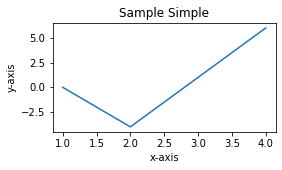

In [7]:
# jupyter için grafiklerin ve resimlerin direkt gözükmesini sağlar.
# Son kısma ";" koyma sebebi çıktının jupyter de vermesini engelemek
%matplotlib inline

import matplotlib.pyplot as plt

x = [1, 1.5, 2, 4]
y = [0, -2, -4, 6]

choice = 2

if choice == 0:
    plt.plot(x, y)
elif choice == 1:
    fig = plt.figure()
    ax = fig.add_subplot()
elif choice == 1:
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 1, 0.5]) # [x0, y0, width, height]
else:
    fig, ax = plt.subplots(figsize=[4,2])
ax.plot(x, y)
ax.set(title="Sample Simple", 
       xlabel="x-axis", 
       ylabel="y-axis")
plt.show()
fig.savefig("../../images/simple_plot.png")

# Numpy Grafik Verisi Oluşturma 
`ax` yerine direkt `((ax1, ax2), (ax3, ax4), (ax5, ax6))` yazılıp direkt değişkenle erişilebilir.

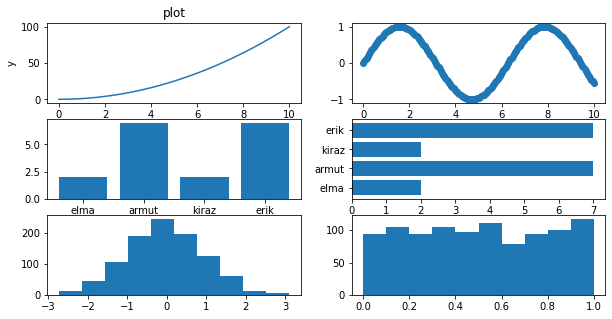

In [9]:
import numpy as np

x = np.linspace(0, 10, 200)
data = {"elma":  2, "armut": 7,
        "kiraz": 2, "erik":  7 }

fig, ax = plt.subplots(nrows=3, 
                                                        ncols=2, 
                                                        figsize=(10, 5))

# Plot data to each axis
ax[0, 0].plot(x, x**2);   # Normal Grafik
ax[0, 1].scatter(x, np.sin(x)) # Nokta Grafiği
ax[1, 0].bar(data.keys(), data.values())
ax[1, 1].barh(list(data.keys()), list(data.values())) # Y Ekseninde Veriler
ax[2, 0].hist(np.random.randn(1000))    # Normal Dağılım Histogram Grafiği (gauss dağilimi)
ax[2, 1].hist(np.random.random(1000))   # Histogram Grafiği

ax[0, 0].set(title = "plot", xlabel = "x", ylabel = "y");

# Pandas Kullanımı

,Make,Colour,Odometer(km),Doors,Price,Sale Date,Total Sales
0,Toyota,White,15000,2,4000,2024-01-05,4000
1,BMW,Red,35000,4,43000,2024-01-06,47000


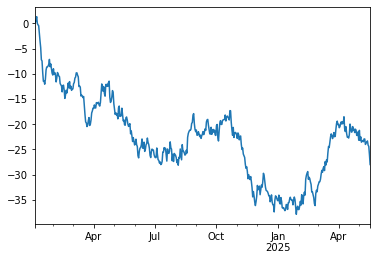

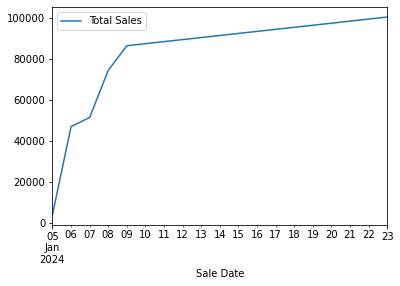

In [10]:
import pandas as pd
car_sales = pd.read_csv("car_data.csv")
car_sales[:5]

ts = pd.Series(np.random.randn(500),
               index=pd.date_range('1/5/2024', periods=500))

# "cumulative sum" sırayıla toplayıp bir sonraki eleman oluşturulur
ts.cumsum().plot(); 

# Geçersiz karakterler düzeltilip sayının değeri düşürüdü
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '', regex=True)
car_sales["Price"] = car_sales["Price"].str[:-2];

car_sales["Sale Date"] = pd.date_range("1/5/2024", periods=len(car_sales))
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales.plot(x='Sale Date', y='Total Sales');

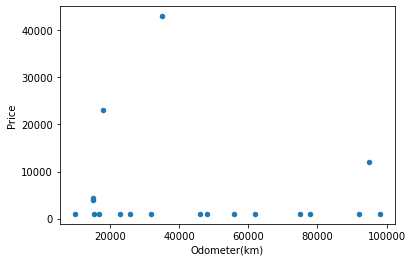

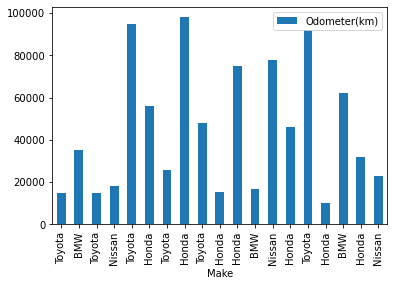

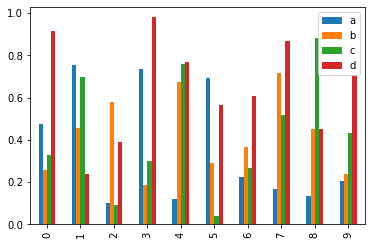

In [12]:
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales.plot(x="Odometer(km)", y="Price", kind='scatter');

# kind ile grafik türü ayarlaması yapılabilir
car_sales.plot(x='Make', y='Odometer(km)', kind='bar'); 

x = np.random.rand(10, 4)
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df.plot.bar(); # Ya da df.plot(kind='bar');